### Generating data using Hidden Markov Models(HMM)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM

import datetime
from data.timeseries import read_data

In [2]:
#Load input data
data = np.loadtxt('data/data_1D.txt', delimiter = ',')

X = np.column_stack([data[:, 2]]) #Extract the third column for training

In [3]:
#Create a Gaussian HMM
num_components = 5
hmm = GaussianHMM(n_components = num_components, covariance_type = 'diag', n_iter = 1000)

hmm.fit(X)

GaussianHMM(n_components=5, n_iter=1000)

In [4]:
print('Means and variances: ')
for i in range(hmm.n_components):
    print('\nHidden state', i+1)
    print('Mean: ', round(hmm.means_[i][0], 2))
    print('Variance: ', round(np.diag(hmm.covars_[i])[0], 2))

Means and variances: 

Hidden state 1
Mean:  2.6
Variance:  0.26

Hidden state 2
Mean:  8.6
Variance:  0.26

Hidden state 3
Mean:  4.6
Variance:  0.25

Hidden state 4
Mean:  0.6
Variance:  0.25

Hidden state 5
Mean:  6.59
Variance:  0.25


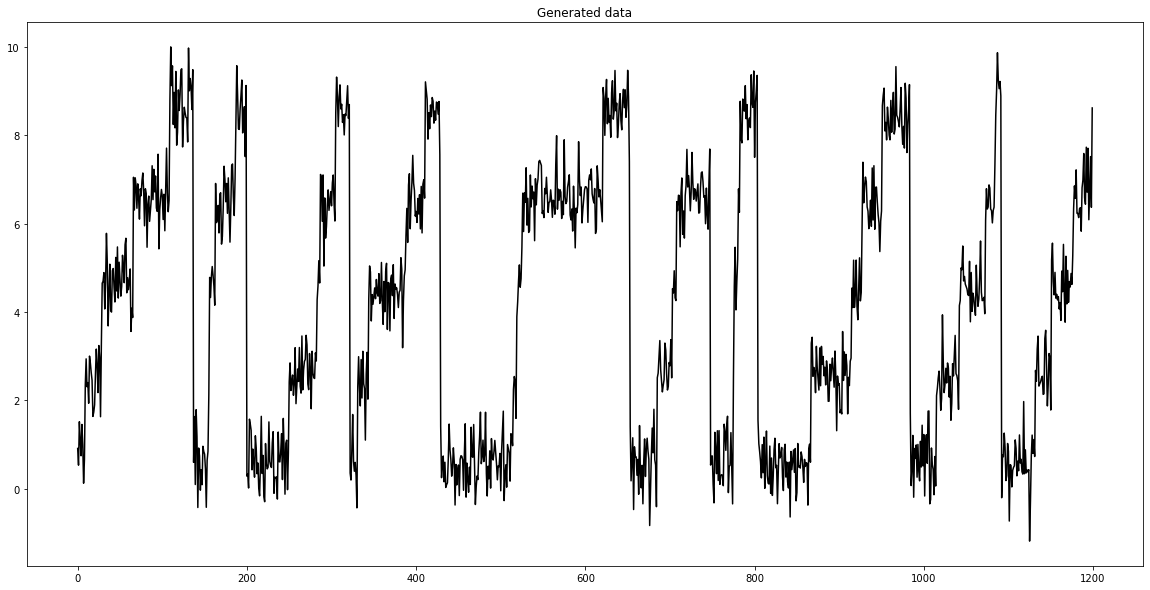

In [5]:
#Generate data using the HMM model
num_samples = 1200
generated_data, _ = hmm.sample(num_samples)

fig, ax = plt.subplots(figsize = (20, 10))
plt.plot(np.arange(num_samples), generated_data[:, 0], c = 'k')
plt.title('Generated data');